The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, we will complete the analysis of what sorts of people were likely to survive. In particular, We will apply the tools of machine learning to predict which passengers survived the tragedy.

A good first step is to think logically about the columns and what we're trying to predict. What variables might logically affect the outcome of survived? (reading more about the Titanic might help here).

We know that women and children were more likely to survive. Thus, Age and Sex are probably good predictors. It's also logical to think that passenger class might affect the outcome, as first class cabins were closer to the deck of the ship. Fare is tied to passenger class, and will probably be highly correlated with it, but might add some additional information. Number of siblings and parents/children will probably be correlated with survival one way or the other, as either there are more people to help you, or more people to think about and try to save.

There's a less clear link between survival and columns like Embarked (maybe there is some information about how close to the top of the ship people's cabins were here), Ticket, and Name.

This step is generally known as acquiring domain knowledge, and it fairly important to most machine learning tasks. We're looking to engineer the features so that we maximize the information we have about what we're trying to predict.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
# Load Data
train = pd.read_csv('../data/titanic_train.csv')
test = pd.read_csv('../data/titanic_test.csv')

In [5]:
# Save PassengerID for final submission
passengerID = test["PassengerId"]

In [6]:
# Create indexes to separate the data later on
train_idx = len(train)
test_idx = len(test)

In [7]:
print(train_idx,test_idx)

891 418


In [8]:
# Merger train and test data
titanic = train.append(test,ignore_index=True,sort=True)

In [9]:
## Data view
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [10]:
## get info of the features
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
print(titanic.shape)
print(train.shape)
print(test.shape)

(1309, 12)
(891, 12)
(418, 11)


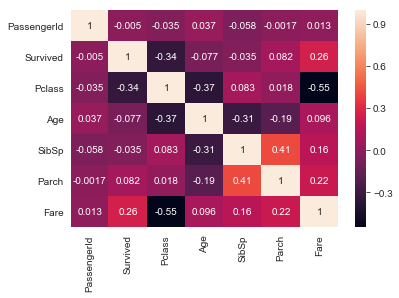

In [13]:
sns.heatmap(train.corr(),annot=True)

In [14]:
train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## columns having missing value - Age,Cabin(maximum),Embarked (2),Fare(1)  ## Total entries 1309 (Train(891) + Test(418))
## * Survived also have null values whuch is expected as it is from test data which we have to predict

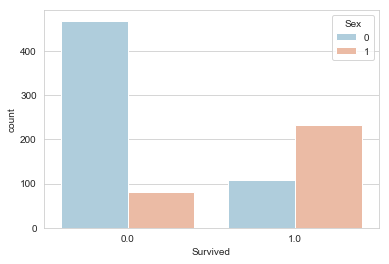

In [63]:
#COUNTPLOT TO SEE SURVIVAL RATES(GENDER-BASED)
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

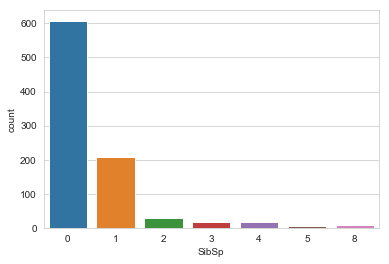

In [67]:
sns.countplot(x='SibSp', data=train)

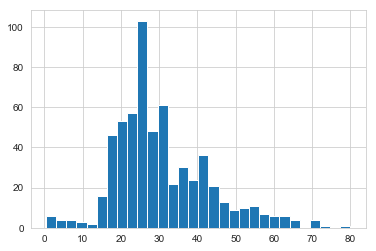

In [68]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)

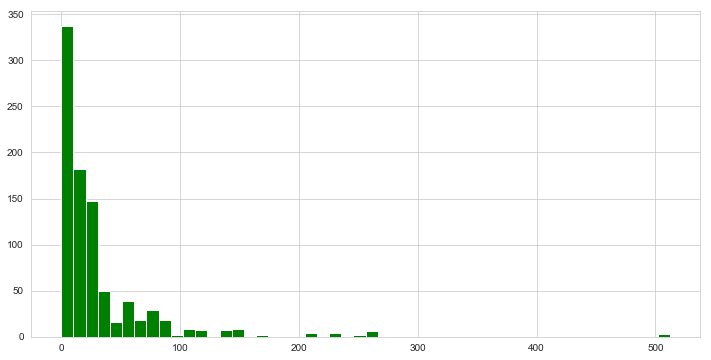

In [69]:
train['Fare'].hist(color='g', bins=50, figsize=(12, 6))

In [ ]:
train[train['Fare']<70]['Fare'].hist(color='g', bins=50, figsize=(12, 6))

In [16]:
## Create a new feature to extract title column from Name column
titanic["Title"] = titanic.Name.apply(lambda name : name.split(',')[1].split('.')[0].strip())

In [17]:
titanic["Title"].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer',
 'Dona']

In [18]:
titanic["Title"].nunique()

18

In [19]:
## We have 18 different titles but we want to genarilze more . To do this we will create a dictionary that mpas to
#6 different boarder catagories and then map the dictionary back to Title feature

### Normalize the titles
normalize_title = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
 

In [20]:
## Map the Normalize titles to the current title
titanic["Title"] = titanic.Title.map(normalize_title)

In [21]:
## View the value for normalized title
print(titanic.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [22]:
## Calculate the missing value of Age --> To do this we will group the dataset by Sex , Pclass and Title 

In [23]:
# Group by sex , Pclass and Title
grouped = titanic.groupby(["Sex","Pclass","Title"])

In [24]:
# View Median Age by grouped feature
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [25]:
# Fill the missing the value of Age with median Age of gruped feature to get more closer approximation
titanic["Age"] = grouped.Age.apply(lambda x : x.fillna(x.median()))

In [26]:
## Now we will fill the missing value for Cabin , Embarked and Fare 
## For Cabin we will fill the missing value with "U"(unknown) , For Emabarked we will fill most frequent value of embarkedment
# and since fare has only one missing value we will just fill with median

In [27]:
## Fill the missing value of Cabin with 'U'
titanic["Cabin"] = titanic.Cabin.fillna('U')

In [28]:
## Check most frequesnt vaue for embarked
titanic.Embarked.value_counts().index[0]

'S'

In [29]:
## Fill the missing vale for Embarked with most frequent value
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [30]:
## fill the missing value for Fare with median
titanic.Fare = titanic.Fare.fillna(titanic.Fare.median())

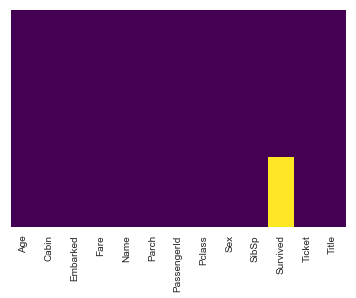

In [32]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [35]:
## the data looks good only survived column has 1309-891 = 418 missing values which we have to predict

#### Feature Engineering

In [37]:
## We will create two more feature
## First is the Family size beacuase having a larger family would have difficult for securing a position in life boat
# than a smaller family , we will use SibSp and Parch column to create Familyzie since these are count
#of sibling/spouse and parent/children respectively per passenger.

In [38]:
## Size of the Family inluding the passenger
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

In [39]:
## In the last feature we simply extract the first letter of cabin which shows where the cabin is located and its 
# potentially importnant since passenger staying in cabin nearer to life boat had a more chance to secure a position
# in the life boat

In [40]:
## Map the first letter of the cabin to itself
titanic["Cabin"] = titanic.Cabin.map(lambda x : x[0])

In [41]:
## View dataset
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1


In [42]:
## Convert all the categorical features to numbers

In [43]:
## Convert male and female to numarcal form
titanic["Sex"] = titanic.Sex.map({"male":0, "female":1})

In [44]:
## Create dummy varribales for categorical features
pclass_dummies = pd.get_dummies(titanic["Pclass"],prefix="Pclass")
cabin_dummies = pd.get_dummies(titanic["Cabin"],prefix="Cabin")
embarked_dummies = pd.get_dummies(titanic["Embarked"],prefix="embarked")
title_dummies = pd.get_dummies(titanic["Title"],prefix="Title")

In [45]:
## Concatinate dummy columns with main dataset
titanic = pd.concat([titanic,pclass_dummies,cabin_dummies,embarked_dummies,title_dummies],axis=1)

In [46]:
## Drop categorical fields
titanic.drop(["Cabin","Embarked","Name","Title","Ticket","Pclass","PassengerId"],axis=1,inplace=True)

In [47]:
## View dataset
titanic.head()

,Age,Fare,Parch,Sex,SibSp,Survived,FamilySize,Pclass_1,Pclass_2,Pclass_3,...,Cabin_U,embarked_C,embarked_Q,embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,7.2500,0,0,1,0.0,2,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1,38.0,71.2833,0,1,1,1.0,2,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,1,0,1.0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,0
3,35.0,53.1000,0,1,1,1.0,2,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,35.0,8.0500,0,0,0,0.0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [48]:
## Ready for modeling

In [49]:
## Split the data into train and test
train = titanic[:train_idx]
test = titanic[train_idx:]

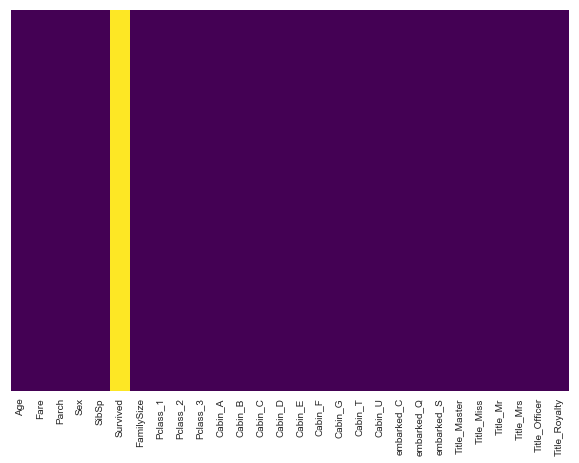

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
## Create X and y for data and target 
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [55]:
## Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [60]:
lr = LogisticRegression(solver="saga", max_iter=10000)

In [61]:
##Calucation of score using Cross_val_score
cv = ShuffleSplit(n_splits=10,test_size=0.3,random_state=50)
scores = cross_val_score(lr,X,y,scoring="f1",cv=cv)

In [62]:
print(scores.mean()) ## Score

0.7510523166520476


In [ ]:
## Use train Test Split to calculate score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
### Fit the model to entire dataset
lr.fit(X,y)

In [ ]:
## Creare X for test set
X_test = test.drop("Survived",axis=1)

In [ ]:
## Calulate the survided for test data
y_pred = lr.predict(X_test)

In [ ]:
###*****### Next we weill apply GridSearchCV for better output

In [ ]:
## data frame with predicted result
titanic_survived = pd.DataFrame({"PassengerID":passengerID,
                                "Survived":y_pred})

In [ ]:
#save to csv
titanic_survived.to_csv("./titanic_pred_survived.csv",index=False)